**RED WINE QUALITY PREDICITON NOTEBOOK**

# 🥂 Step 1.1 | Import Libraries 

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

print(colored('\nAll libraries imported succesfully.', 'green'))


All libraries imported succesfully.


In [63]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

# 🥂 Step 1.2 | Reproducibility & Constants 

In [64]:
# Recommendation: Set `random_state` everywhere randomness is used (splits, models with randomness, CV with shuffling).
# Setting a global random state ensures that all subsequent randomized operations are reproducible.
RANDOM_SEED = 42

# 🥂 Step 2.1 | Collecting Data

In [65]:
# Import data by using pandas liblary and using read_csv method
data = pd.read_csv('C:\\Users\\Chaitanyaa\\Projects\\MINOR IN AI PROJECT\\winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 🥂 Step 2.2 | Data Dictionary
 Recommendation: Document feature definitions and any domain transformations; include a data dictionary.
- `fixed acidity`: The amount of tartaric acid in the wine.
- `volatile acidity`: The amount of acetic acid in the wine; high levels can lead to an unpleasant, vinegar taste.
- `citric acid`: A natural preservative found in small quantities; adds 'freshness' and flavor to wines.
- `residual sugar`: The amount of sugar remaining after fermentation stops; sweet wines have higher levels.
- `chlorides`: The amount of salt in the wine.
- `free sulfur dioxide`: The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
- `total sulfur dioxide`: The total amount of free and bound forms of SO2.
- `density`: The density of the wine, which is related to the percentage of alcohol and sugar.
- `pH`: The level of acidity or alkalinity; a measure of the hydrogen ion concentration. Most wines are between 3-4 on the pH scale.
- `sulphates`: A wine additive that can contribute to sulfur dioxide gas levels.
- `alcohol`: The percentage of alcohol by volume in the wine.
- `quality`: The target variable, representing the wine's quality score from 0-10.


# 🥂 Step 2.3 | Data Information

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [67]:
data.describe().T.style.background_gradient(axis=0, cmap='Purples')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


# 🥂 Step 3.1 | Missing Values Handling

In [68]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [69]:
data.drop_duplicates(inplace=True)

# 🥂 Step 3.2 | Visualization and Plots

In [70]:
# Rename columns to better recall them.
data.rename(columns = {"fixed acidity": "fixed_acidity",
                       "volatile acidity": "volatile_acidity",
                       "citric acid": "citric_acid",
                       "residual sugar": "residual_sugar",
                       "chlorides": "chlorides",
                       "free sulfur dioxide": "free_sulfur_dioxide",
                       "total sulfur dioxide": "total_sulfur_dioxide"},
            inplace = True)

In [71]:
# Create a list of DataFrame columns
columns = list(data.columns)

In [72]:
data.groupby('quality').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.171231,0.578596,0.244523,2.509532,0.093971,17.161179,57.406412,0.997082,3.300815,0.623570,9.888562
6,8.337383,0.496084,0.279364,2.457290,0.085075,15.637383,40.816822,0.996565,3.318000,0.674542,10.658879
7,8.858683,0.403653,0.371856,2.716766,0.076832,13.994012,35.449102,0.996051,3.290060,0.742635,11.491118
8,8.441176,0.427647,0.382941,2.576471,0.068353,13.764706,34.470588,0.995095,3.274118,0.774706,12.158824


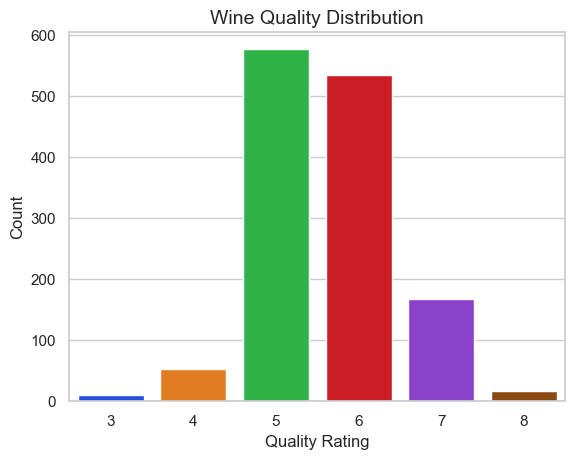

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set a clean theme
sns.set_theme(style='whitegrid')

# Ensure 'quality' is numeric
data['quality'] = pd.to_numeric(data['quality'], errors='coerce')

# Use the 'bright' palette for vivid colors
sns.countplot(x='quality', data=data, palette='bright')

# Add labels and title
plt.title('Wine Quality Distribution', fontsize=14)
plt.xlabel('Quality Rating')
plt.ylabel('Count')

# Show the plot
plt.show()


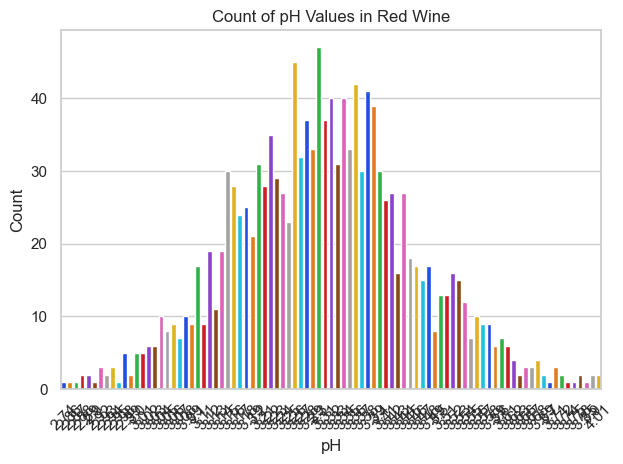

In [74]:
# Step 1: Ensure pH is numeric
data['pH'] = pd.to_numeric(data['pH'], errors='coerce')

# Step 2: Round and convert to string for categorical plotting
data['pH_str'] = data['pH'].round(2).astype(str)

# Step 3: Sort values by pH for cleaner display
order = data['pH_str'].value_counts().sort_index().index

# Step 4: Create the count plot with vibrant colors
sns.countplot(x='pH_str', data=data, order=order, palette='bright')
plt.xlabel('pH')
plt.ylabel('Count')
plt.title('Count of pH Values in Red Wine')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

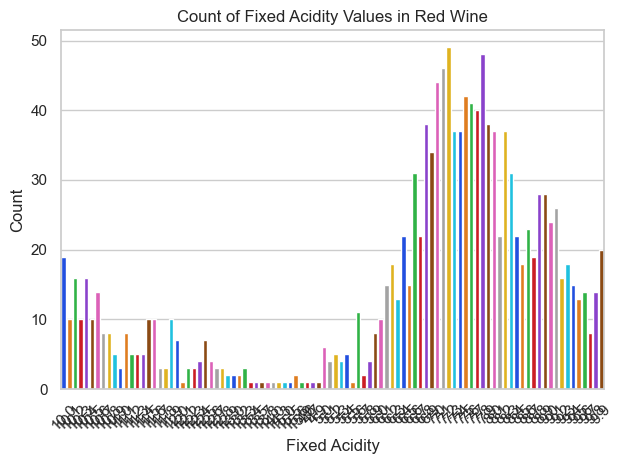

In [75]:
# Step 1: Ensure fixed acidity is numeric
data['fixed_acidity'] = pd.to_numeric(data['fixed_acidity'], errors='coerce')

# Step 2: Round and convert to string for categorical plotting
data['fixed_acidity_str'] = data['fixed_acidity'].round(2).astype(str)

# Step 3: Sort values by fixed acidity for cleaner display
order = data['fixed_acidity_str'].value_counts().sort_index().index

# Step 4: Create the count plot with vibrant colors
sns.countplot(x='fixed_acidity_str', data=data, order=order, palette='bright')
plt.xlabel('Fixed Acidity')
plt.ylabel('Count')
plt.title('Count of Fixed Acidity Values in Red Wine')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

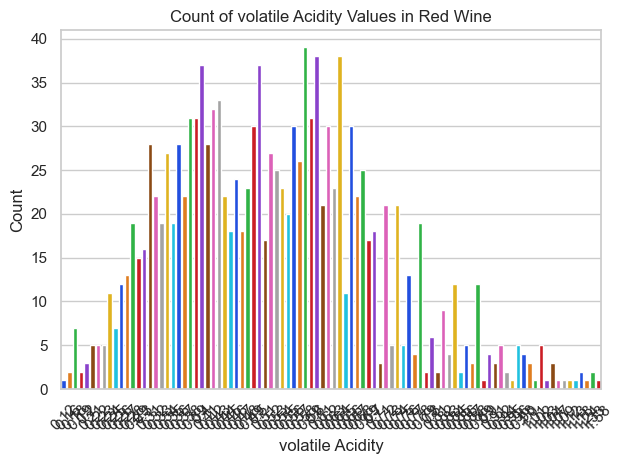

In [76]:
# Step 1: Ensure fixed acidity is numeric
data['volatile_acidity'] = pd.to_numeric(data['volatile_acidity'], errors='coerce')

# Step 2: Round and convert to string for categorical plotting
data['volatile_acidity_str'] = data['volatile_acidity'].round(2).astype(str)

# Step 3: Sort values by fixed acidity for cleaner display
order = data['volatile_acidity_str'].value_counts().sort_index().index

# Step 4: Create the count plot with vibrant colors
sns.countplot(x='volatile_acidity_str', data=data, order=order, palette='bright')
plt.xlabel('volatile Acidity')
plt.ylabel('Count')
plt.title('Count of volatile Acidity Values in Red Wine')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

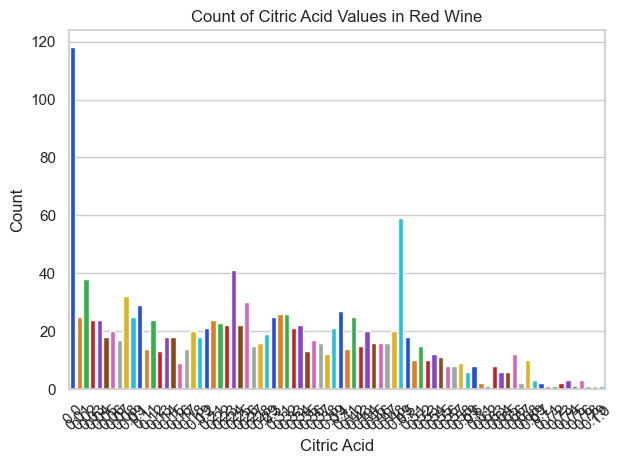

In [77]:
# Step 1: Ensure fixed acidity is numeric
data['citric_acid'] = pd.to_numeric(data['citric_acid'], errors='coerce')

# Step 2: Round and convert to string for categorical plotting
data['citric_acid_str'] = data['citric_acid'].round(2).astype(str)

# Step 3: Sort values by fixed acidity for cleaner display
order = data['citric_acid_str'].value_counts().sort_index().index

# Step 4: Create the count plot with vibrant colors
sns.countplot(x='citric_acid_str', data=data, order=order, palette='bright')
plt.xlabel('Citric Acid')
plt.ylabel('Count')
plt.title('Count of Citric Acid Values in Red Wine')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KDE plot for quality distribution of wines with quality > 2
Distribution plot for alcohol content in wines


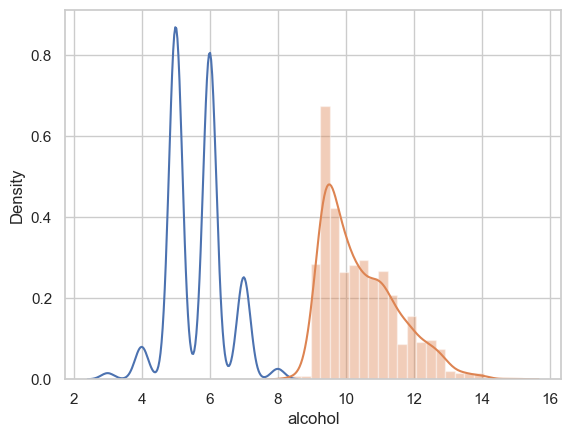

In [78]:
sns.kdeplot(data.query('quality > 2').quality)
print("KDE plot for quality distribution of wines with quality > 2")

sns.distplot(data['alcohol'])
print("Distribution plot for alcohol content in wines")

<Axes: xlabel='alcohol', ylabel='Density'>

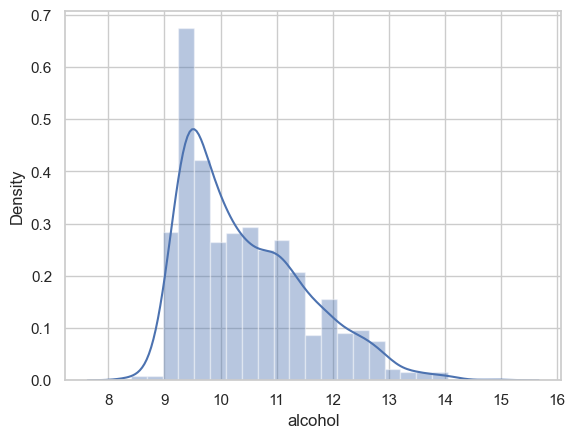

In [79]:
sns.distplot(data['alcohol'])

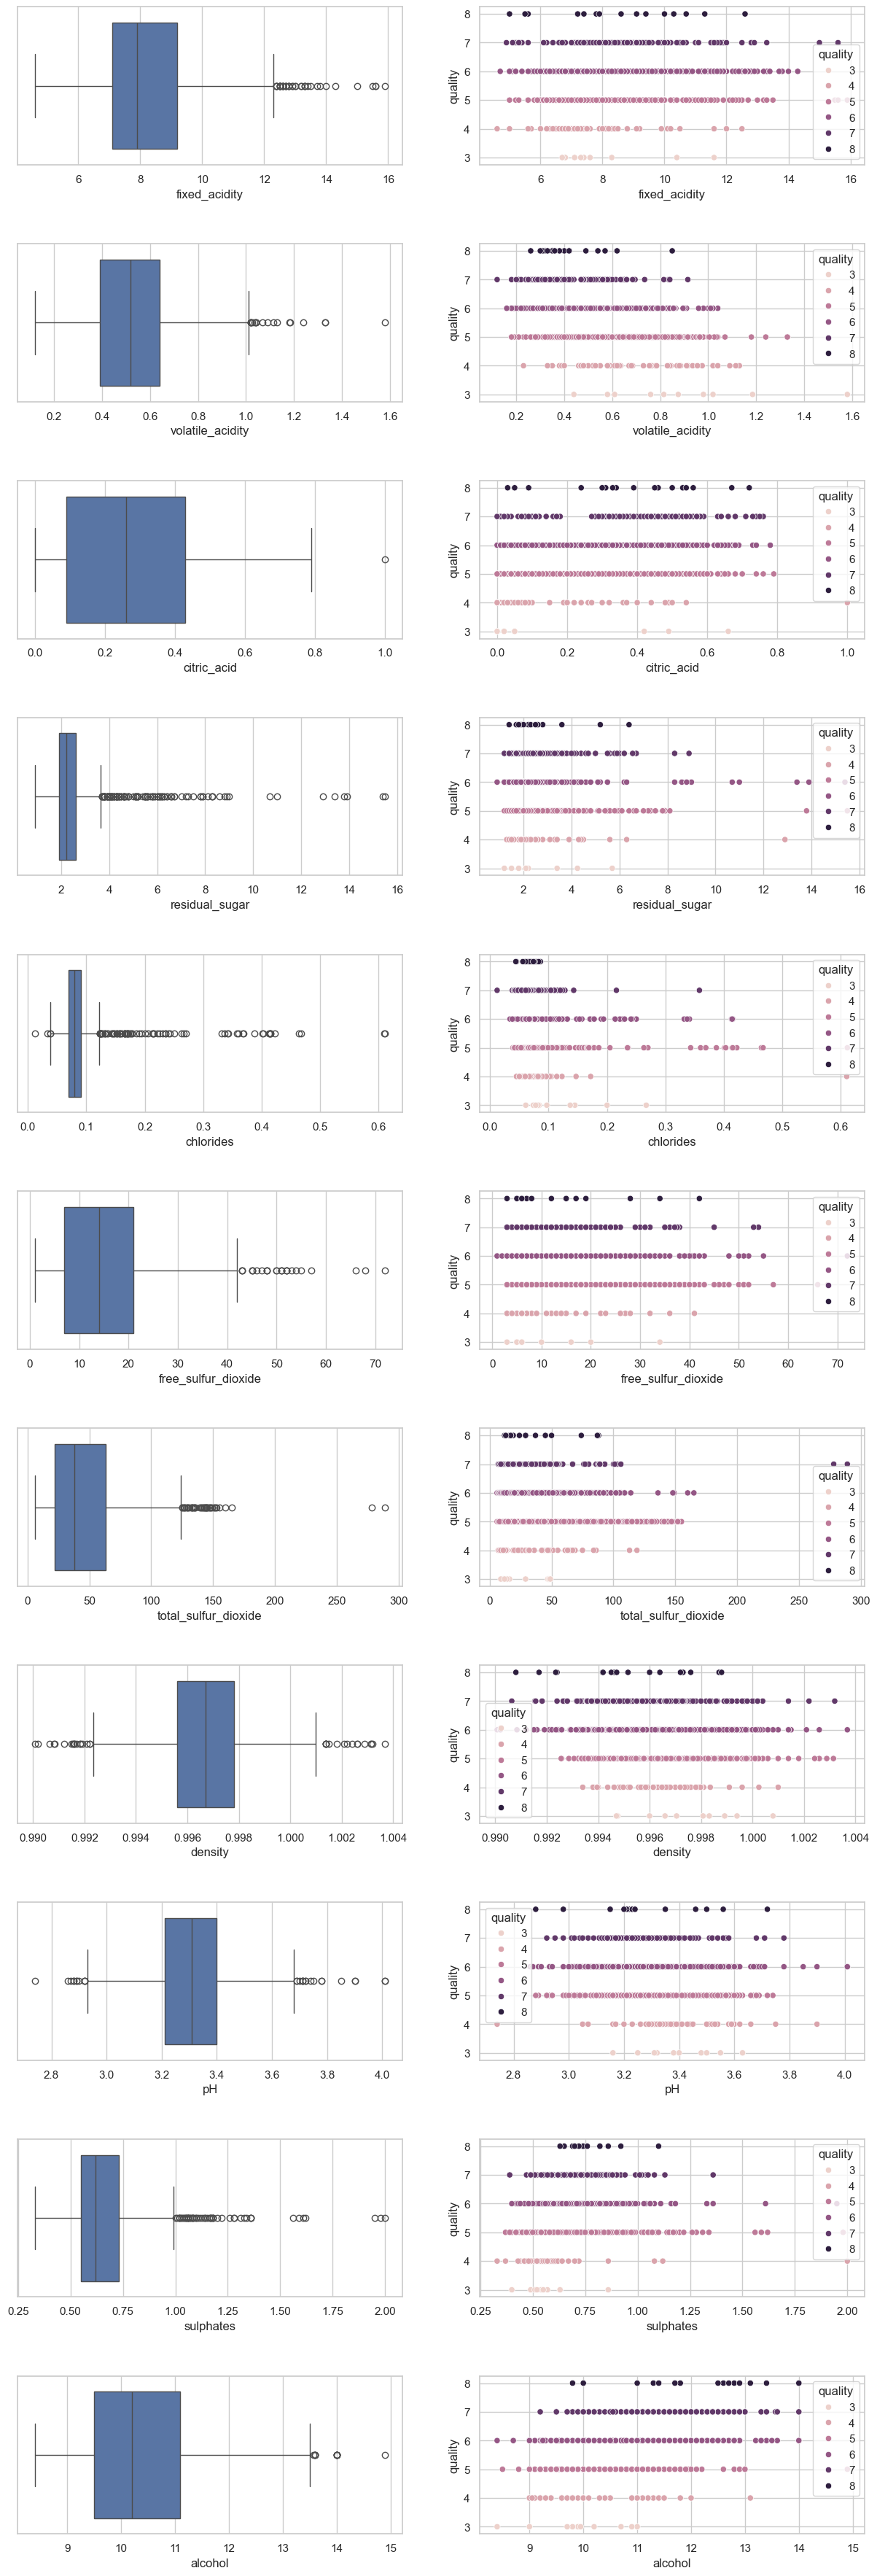

In [80]:
fig, ax = plt.subplots(11, 2, figsize=(15, 45))
plt.subplots_adjust(hspace = 0.5)
for i in range(11) :
    # AX 1
    sns.boxplot(x=columns[i], data=data, ax=ax[i, 0])
    # Ax 2
    sns.scatterplot(x=columns[i], y='quality', data=data, hue='quality', ax=ax[i, 1])

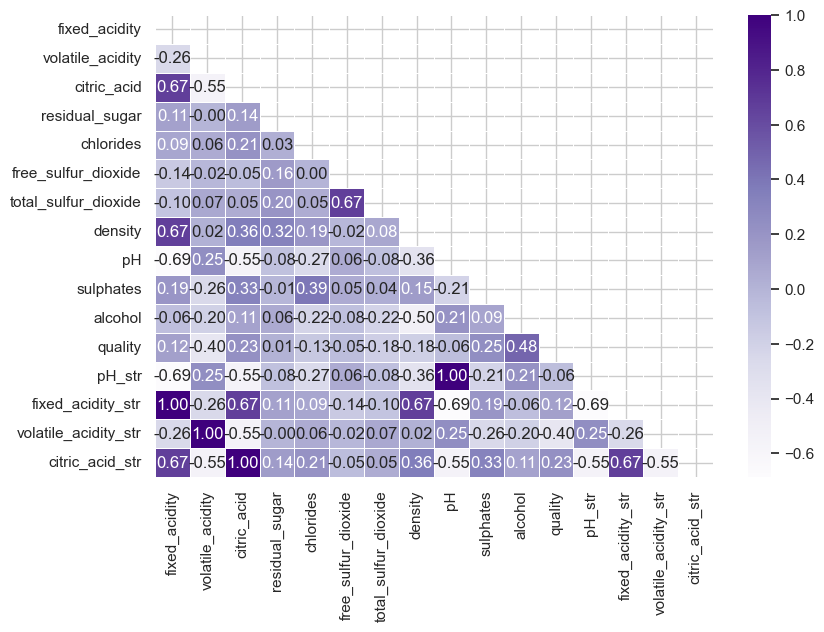

In [81]:
corr = data.corr()
# cmap = sns.diverging_palette(-1, 1, s=100, l=50, n=15, center="dark", as_cmap=True)
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Purples', mask=np.triu(corr))
plt.show()

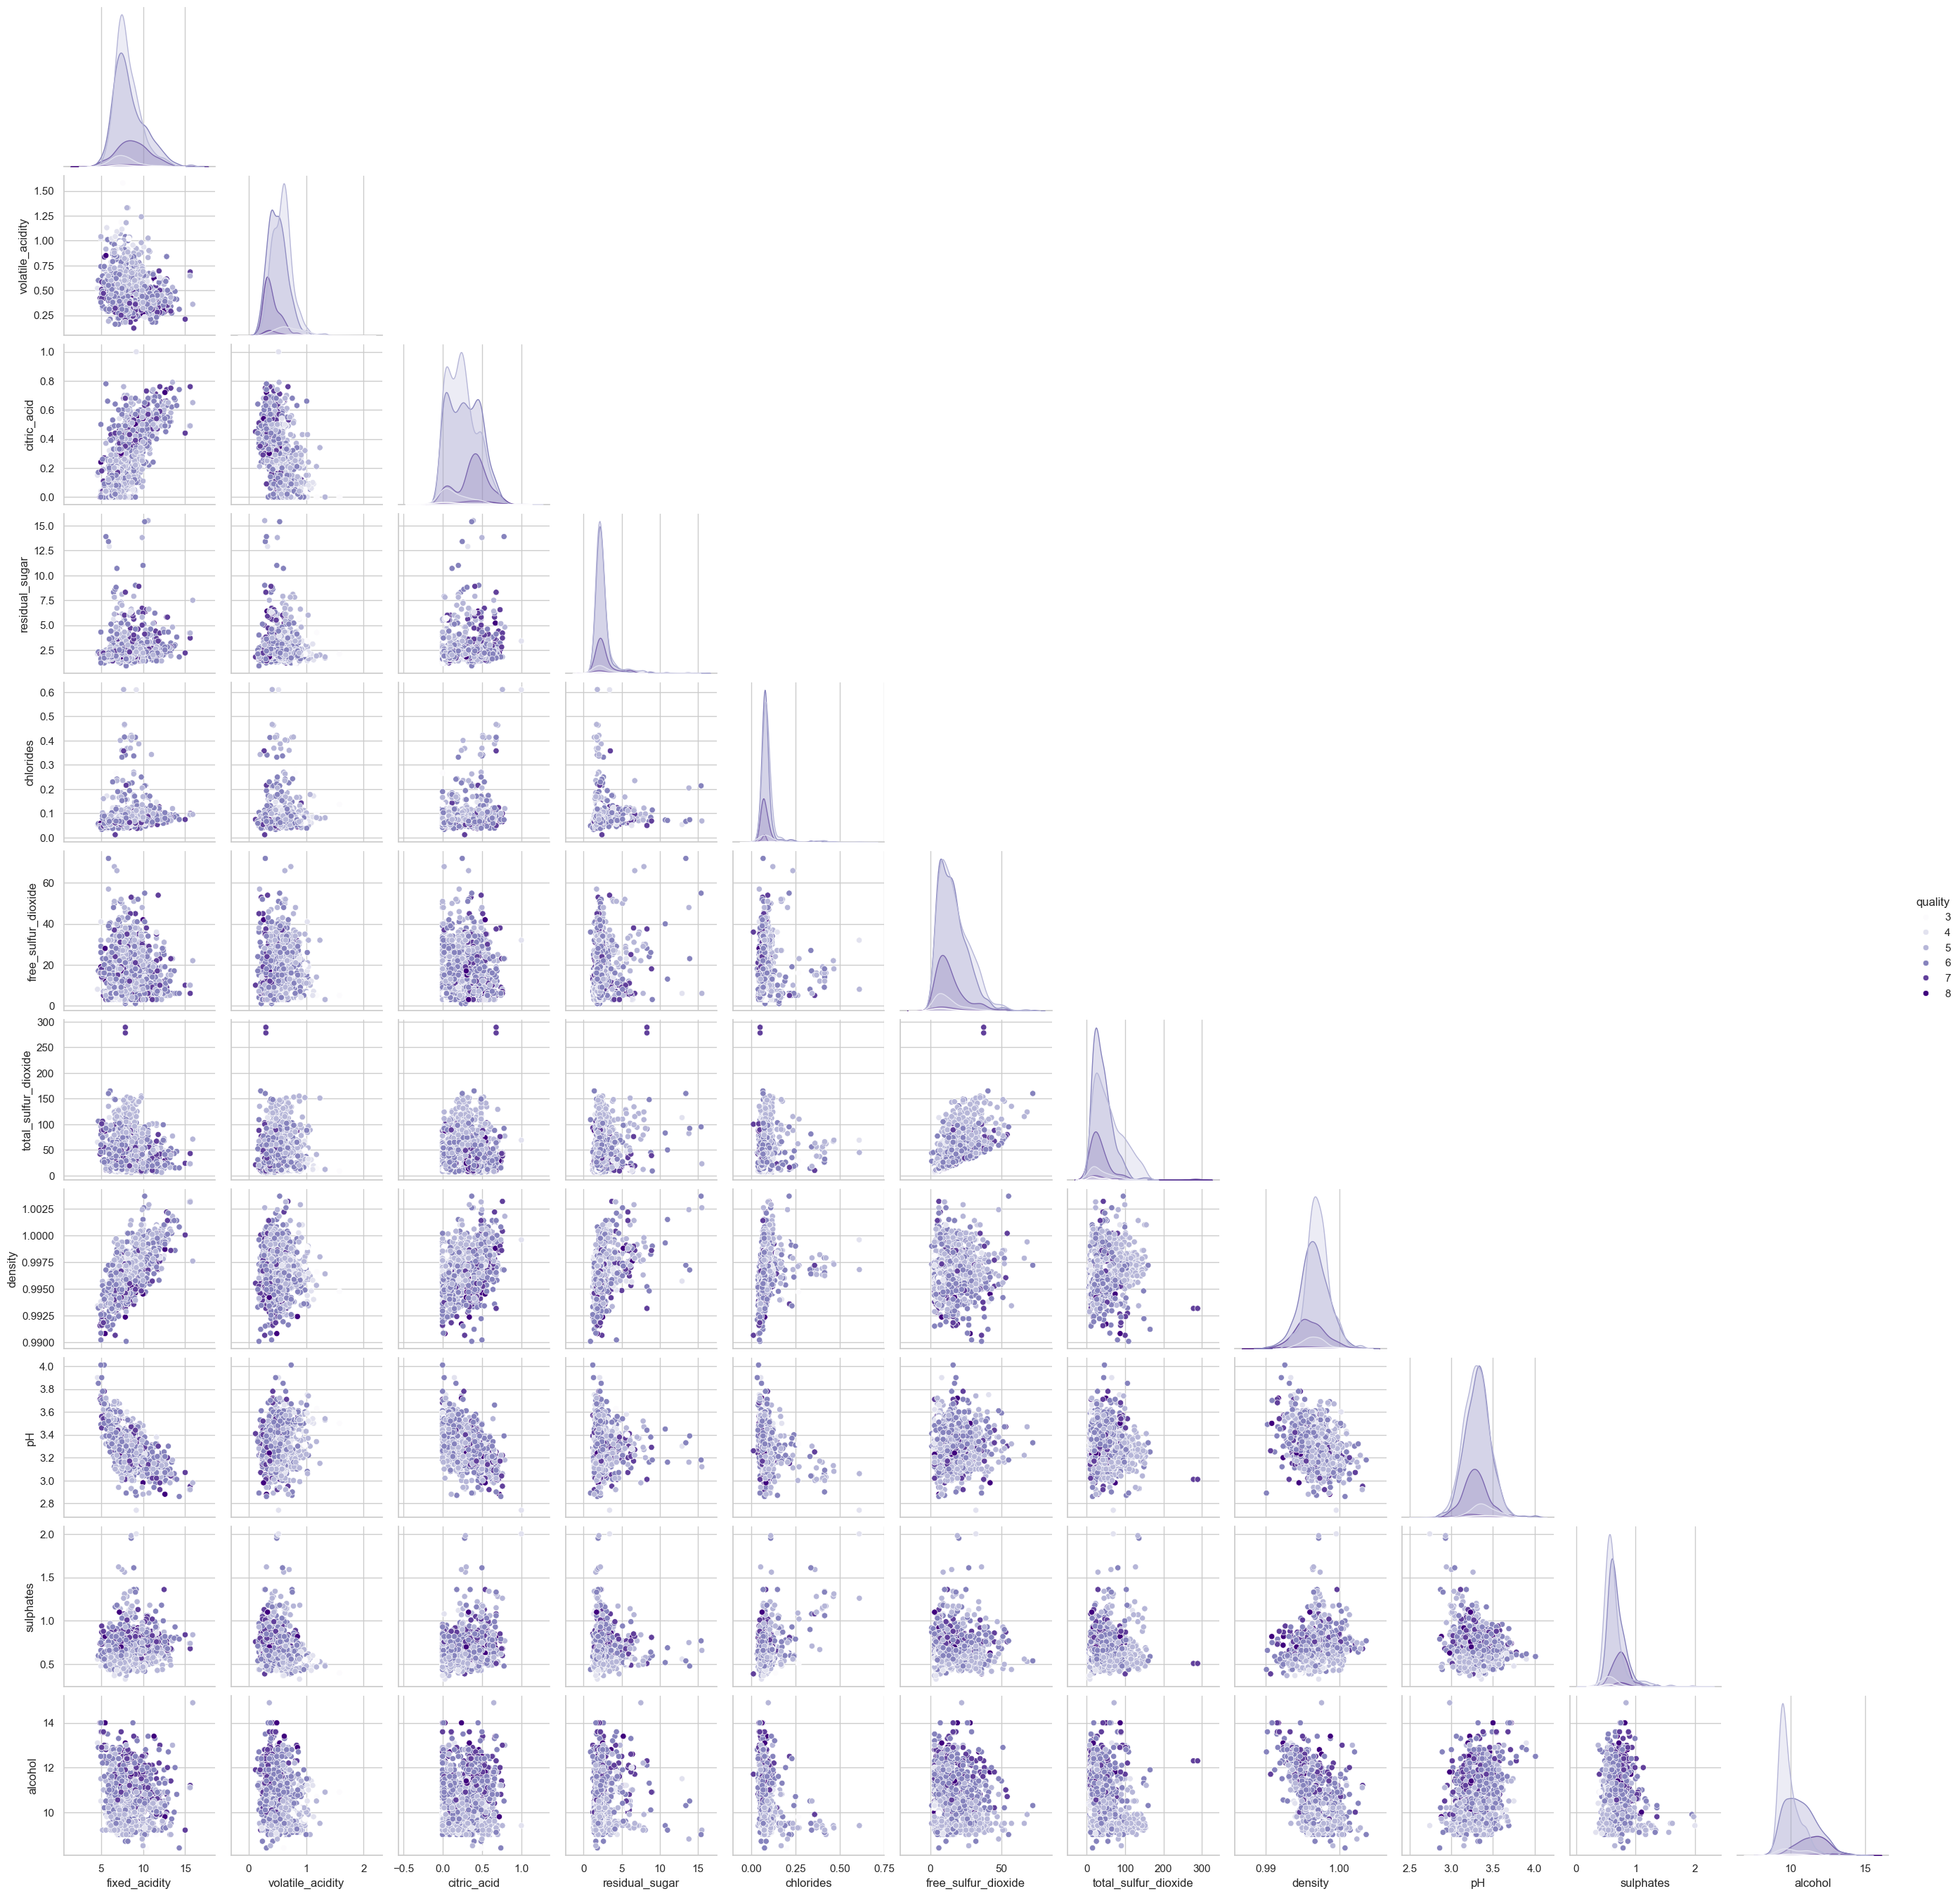

In [82]:
sns.pairplot(data, hue='quality', corner = True, palette='Purples')

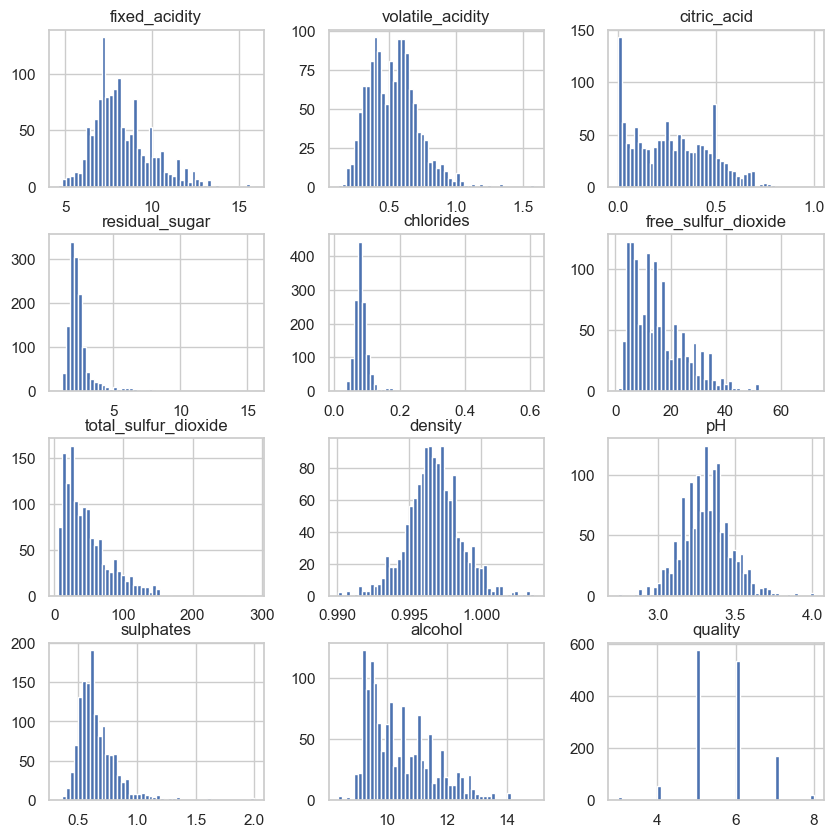

In [83]:
data.hist(figsize=(10,10),bins=50)
plt.show()

<Axes: >

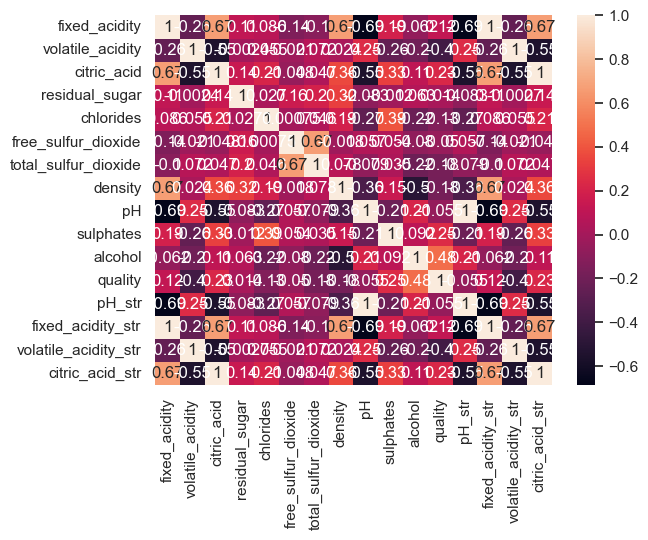

In [84]:
corr = data.corr()
sns.heatmap(corr,annot=True)

<Axes: xlabel='quality', ylabel='alcohol'>

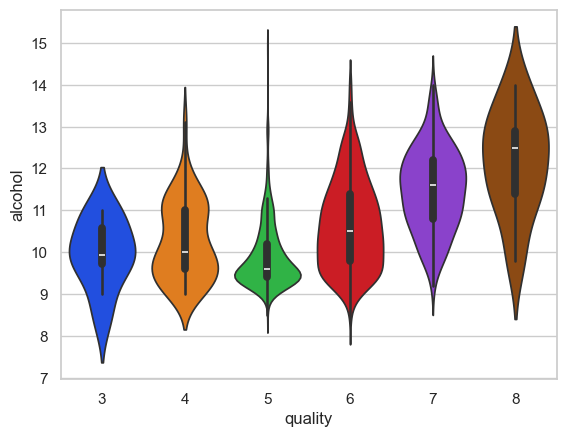

In [85]:
sns.violinplot(x='quality', y='alcohol', data=data, palette='bright')

# 🥂 Step 3.3 | Plots Analysis

Best Correlations are between :

*   citeic_acid & flex_acidity ---> 0.67
*   density & flex_acidity ---> 0.67
*   total_sulfor_dioxide & free_sulfor_dioxide ---> 0.67

# 🥂  Step 3.4 | Target Categorizing

In [86]:
# Quality classes :
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [87]:
data = data.replace({'quality' : {
                                    8 : 'Good',
                                    7 : 'Good',
                                    6 : 'Middle',
                                    5 : 'Middle',
                                    4 : 'Bad',
                                    3 : 'Bad',
        }}
)

In [88]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,pH_str,fixed_acidity_str,volatile_acidity_str,citric_acid_str
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle,3.51,7.4,0.7,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Middle,3.2,7.8,0.88,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Middle,3.26,7.8,0.76,0.04
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Middle,3.16,11.2,0.28,0.56
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Middle,3.51,7.4,0.66,0.0


# 🥂 Step 3.5 | Normalization

In [89]:
# Create X from DataFrame and y as Target
X_temp = data.drop(columns='quality')
y = data.quality

In [90]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe().T.style.background_gradient(axis=0, cmap='Purples')

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1359.000000,0.328371,0.153716,0.000000,0.221239,0.292035,0.407080,1.000000
volatile_acidity,1359.000000,0.280464,0.125364,0.000000,0.184932,0.273973,0.356164,1.000000
citric_acid,1359.000000,0.272333,0.195537,0.000000,0.090000,0.260000,0.430000,1.000000
residual_sugar,1359.000000,0.111192,0.092624,0.000000,0.068493,0.089041,0.116438,1.000000
chlorides,1359.000000,0.127085,0.082432,0.000000,0.096828,0.111853,0.131886,1.000000
free_sulfur_dioxide,1359.000000,0.209765,0.147145,0.000000,0.084507,0.183099,0.281690,1.000000
total_sulfur_dioxide,1359.000000,0.144261,0.118053,0.000000,0.056537,0.113074,0.201413,1.000000
density,1359.000000,0.487441,0.137219,0.000000,0.406021,0.486784,0.569016,1.000000
pH,1359.000000,0.448651,0.122076,0.000000,0.370079,0.448819,0.519685,1.000000
sulphates,1359.000000,0.196829,0.102196,0.000000,0.131737,0.173653,0.239521,1.000000


# 🥂 Step 4.1 | Initialization

In [91]:
# define a function to ploting Confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    '''Plotting Confusion Matrix'''
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Purples")
    ax.set_xlabel('Prediced labels', fontsize=18)
    ax.set_ylabel('True labels', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=25)
    ax.xaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    ax.yaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    plt.show()

In [92]:
# define a function to ploting Classification report
def clfr_plot(y_test, y_pred) :
    ''' Plotting Classification report'''
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred_rf, digits=3,
                                            output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    sns.heatmap(cr, cmap='Purples', annot=True, linecolor='white', linewidths=0.5).xaxis.tick_top()

In [93]:
def clf_plot(y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Left AX : Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="Purples", ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    ax[0].yaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    # Right AX : Classification Report
    ax[1] = sns.heatmap(cr, cmap='Purples', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

In [94]:
data.quality.value_counts()

quality
Middle    1112
Good       184
Bad         63
Name: count, dtype: int64

In [95]:
# Splite Dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED, stratify=y)

# 🥂 Step 4.2 | LogisticRegression

In [96]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

Tuned hyper parameters :  {'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}
accuracy :  0.825354300135896


In [97]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

In [98]:
y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression score : ', lr_score)

LogisticRegression score :  0.824


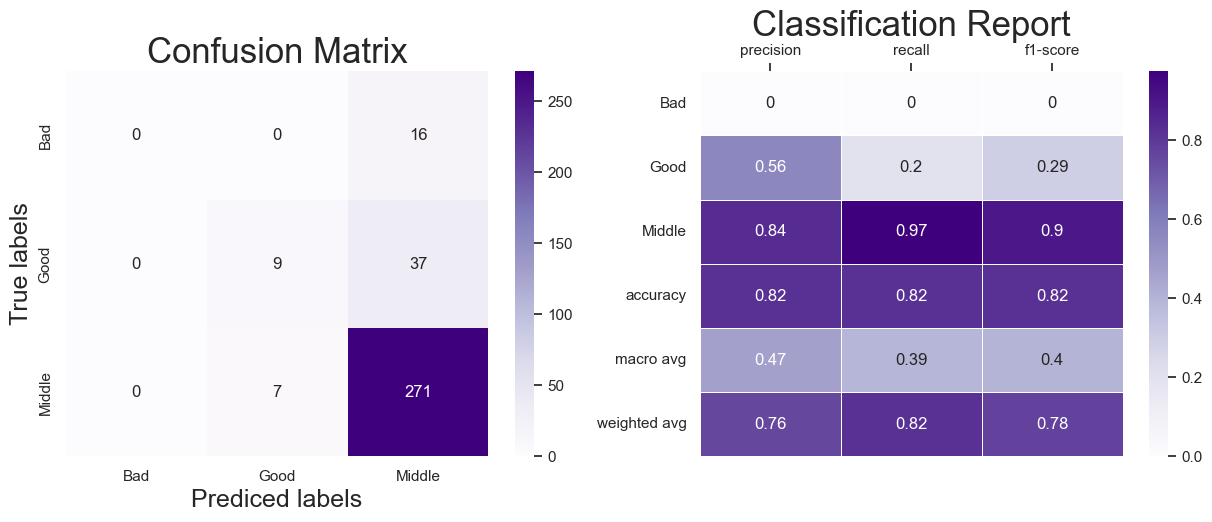

In [99]:
clf_plot(y_pred_lr)

# 🥂 Step 4.3 | SVC

In [100]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}



svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)



print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 10, 'gamma': 1.0}
accuracy :  0.8292661619103086


In [101]:
# Model
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)

In [102]:
y_pred_svc = svc.predict(X_test)

svc_score = round(svc.score(X_test, y_test), 3)
print('SVC Score : ', svc_score)

SVC Score :  0.844


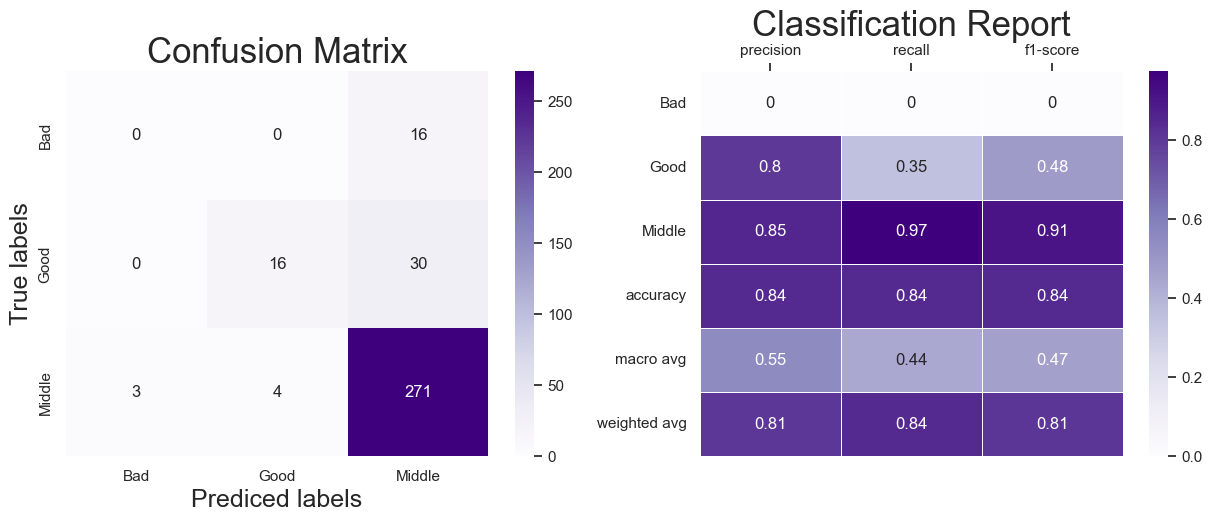

In [103]:
clf_plot(y_pred_svc)

# 🥂 Step 4.4 | Support Vector Machine

In [104]:
from sklearn.svm import SVC

# creating the model
model = SVC()

# feeding the training set into the model
model.fit(X_train, y_train)

# predicting the results for the test set
y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

Training accuracy : 0.8331697742885181
Testing accuracy : 0.8264705882352941


In [105]:
# finding the best parameters for the SVC model

param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model, param_grid = param, scoring = 'accuracy', cv = 10)


In [106]:
grid_svc.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.8, 0.9, ...], 'gamma': [0.1, 0.8, ...], 'kernel': ['linear', 'rbf']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1.4


In [107]:
grid_svc.best_params_

{'C': 1.4, 'gamma': 1.4, 'kernel': 'rbf'}

In [ ]:
# creating a new SVC model with these best parameters

from sklearn.metrics import classification_report


model2 = SVC(C = 1.4, gamma = 1.4, kernel = 'rbf')
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        16
        Good       1.00      0.04      0.08        46
      Middle       0.82      1.00      0.90       278

    accuracy                           0.82       340
   macro avg       0.61      0.35      0.33       340
weighted avg       0.81      0.82      0.75       340



# 🥂 Step 4.5 | DecisionTreeClassifier

In [112]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }



tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)



print('Tuned hyper parameters : ', tree_cv.best_params_)
print('accuracy : ', tree_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'log_loss', 'max_depth': np.int64(4), 'splitter': 'random'}
accuracy :  0.8273053775965833


In [113]:
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)

In [114]:
y_pred_tree = tree.predict(X_test)

tree_score = round(tree.score(X_test, y_test), 3)
print('DecisionTreeClassifier Score : ', tree_score)

DecisionTreeClassifier Score :  0.794


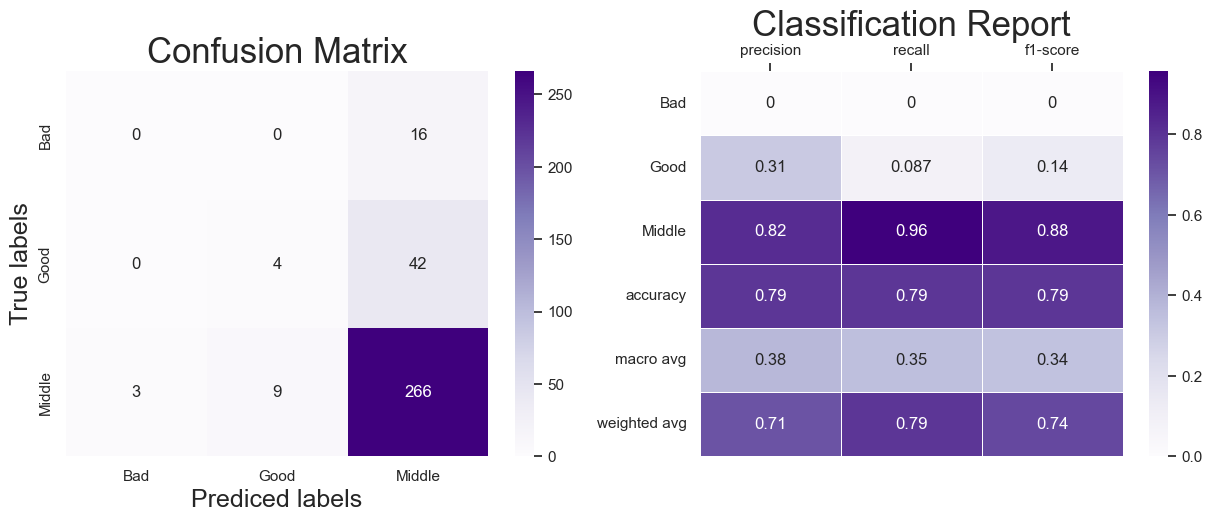

In [115]:
clf_plot(y_pred_tree)

# 🥂 Step 4.6 | KNeighborsClassifier

In [116]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)


Tuned hyper parameters :  {'n_neighbors': np.int64(15), 'p': 2, 'weights': 'distance'}
accuracy :  0.8390894971850125


In [117]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

In [118]:
y_pred_knn = knn_cv.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score :', knn_score)

KNeighborsClassifier Score : 0.835


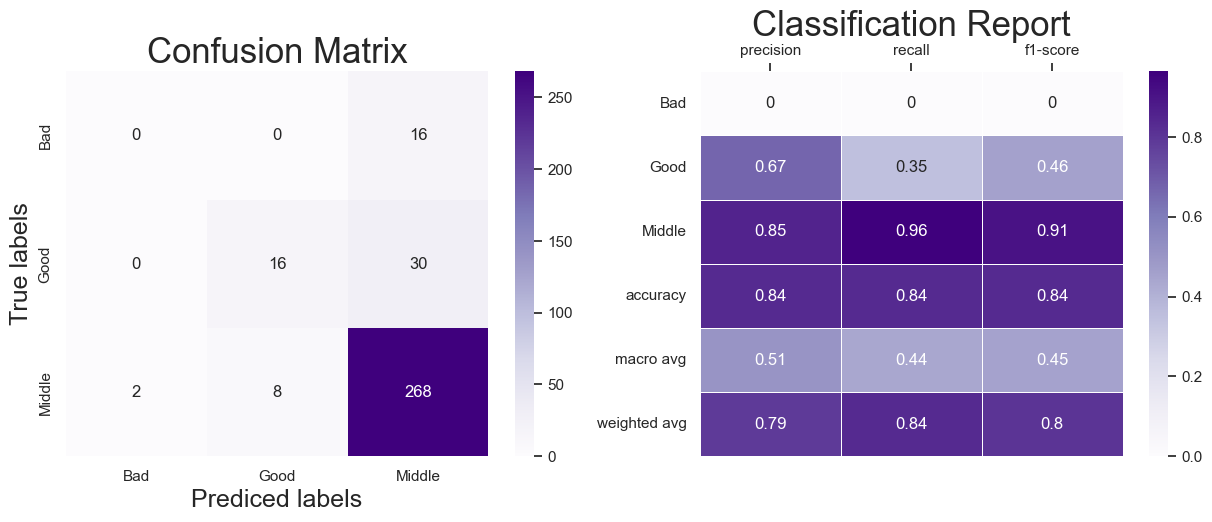

In [119]:
clf_plot(y_pred_knn)

# 🥂 Step 4.7 | GaussianNB

In [120]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_score = round(gnb.score(X_test, y_test), 3)
print('GNB Score :', gnb_score)

GNB Score : 0.729


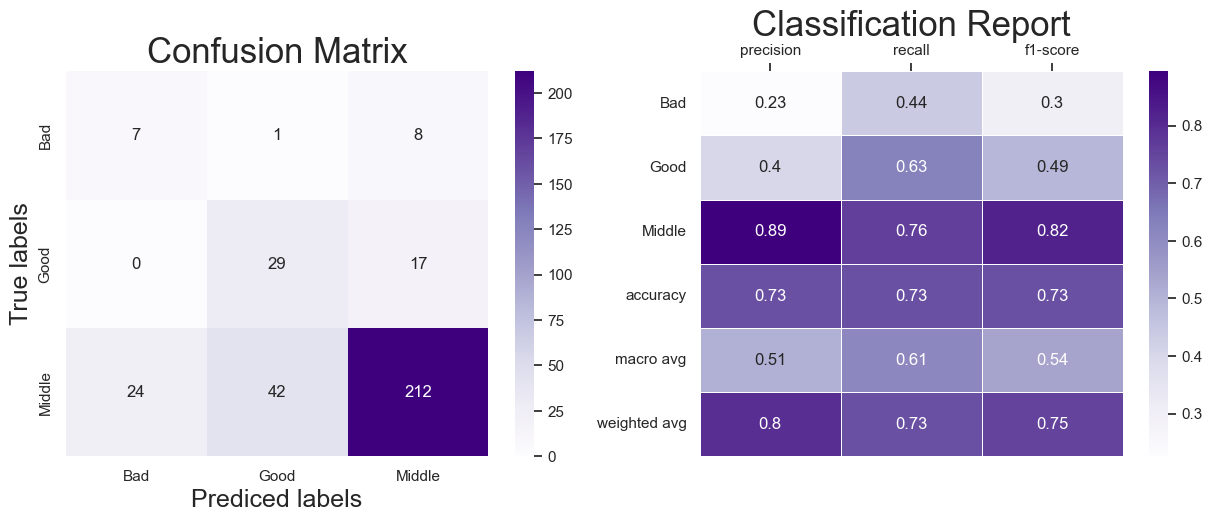

In [121]:
clf_plot(y_pred_gnb)

# 🥂 Step 4.8 | Random Forest Classifier

In [126]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
model.fit(X_train, y_train)

# predicting the results for the test set
y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.8352941176470589


In [128]:
# classification report
from sklearn.metrics import confusion_matrix


print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        16
        Good       0.71      0.33      0.45        46
      Middle       0.85      0.97      0.91       278

    accuracy                           0.84       340
   macro avg       0.52      0.43      0.45       340
weighted avg       0.79      0.84      0.80       340

[[  0   0  16]
 [  0  15  31]
 [  3   6 269]]


In [129]:
#Now lets try to do some evaluation for random forest model using cross validation.

model_eval = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
model_eval.mean()


np.float64(0.8400795961949136)

# 🥂 Step 4.9 | Multi Layer Perceptron Classifier

In [130]:
from sklearn.neural_network import MLPClassifier

# creating the model
model = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 150)

# feeding the training data to the model
model.fit(X_train, y_train)

# calculating the accuracies
print("training accuracy :", model.score(X_train, y_train))
print("testing accuracy :", model.score(X_test, y_test))

training accuracy : 0.8488714425907753
testing accuracy : 0.8264705882352941


# 🥂 Step 4.10 | Artificial Neural Network

In [131]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [132]:
# 1. Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Load your data and separate features (X) and target (y)
# Example data loading (replace with your actual data loading)
dataset = pd.read_csv('winequality-red.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

# Assuming the categorical columns are at index 1 and 2 of your initial X
# For example, if 'Country' and 'Gender' are at these indices
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [1, 2])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

# Label encode the target variable if it's not binary (0/1)
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# NOW you can train your neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0321 - loss: -1.0113   
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0328 - loss: -43.7833  
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0328 - loss: -253.6031  
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0328 - loss: -766.1990  
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0328 - loss: -1691.7753  
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0328 - loss: -3122.4485  
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0328 - loss: -5138.5503  
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0328 - loss: -7807.6738  
Epoch 9/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0328 - loss: -11179.2578  
Epoch 10/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0328 - loss: -15324.6973  
Epoch 11/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0328 

# 🥂 Step 4.11 | Result

In [135]:
result = pd.DataFrame({
    'Algorithm' : ['LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianNB', 'RandomForestClassifier', 'MLPClassifier', 'DecisionTreeClassifier'],
    'Score' : [lr_score, svc_score, tree_score, knn_score, gnb_score , 0.8725 , 0.8475 ,0.8365 ]
})

result.sort_values(by='Score', inplace=True)

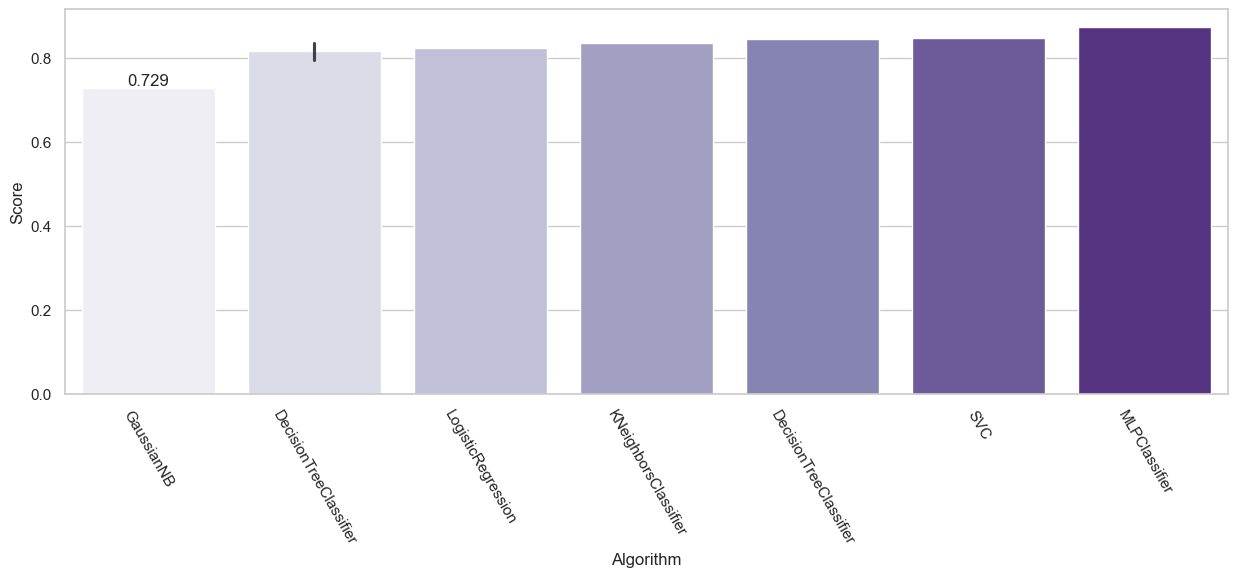

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result, palette="Purples") # Pass palette here
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

**Results :**
**Acording to the above plots, best algorithm base on Score is :**
**SVC (Is Chosen)**

# 🥂 Step 4.12 | Final Modeling

In [136]:
# Model
svc = SVC(**svc_cv.best_params_)

In [137]:
svc.fit(X, y)

,C,10
,kernel,'rbf'
,degree,3
,gamma,1.0
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# 🥂 Step 5.1 | User Prediction

In [142]:
# Import necessary libraries
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# --- 1. Data Loading and Preprocessing ---
# This part of the code simulates the initial steps of the notebook
# and should be executed before the prediction function is used.

# Load the dataset (assuming 'winequality-red.csv' is in the same directory)
data = pd.read_csv('winequality-red.csv')

# Rename columns for consistency
data.rename(columns={
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide'
}, inplace=True)

# Map the quality scores to categorical labels
data['quality'] = data['quality'].replace({
    8: 'Good', 7: 'Good',
    6: 'Middle', 5: 'Middle',
    4: 'Bad', 3: 'Bad'
})

# Define features (X) and target (y)
X = data.drop(columns='quality')
y = data['quality']

# Split the data into training and test sets for proper model evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# --- 2. Train the Model with a Pipeline ---
# As per the review, a Pipeline is used to prevent data leakage and simplify the workflow.
# It chains the scaler and the classifier together.
# We are using SVC with the best parameters found from a GridSearchCV run.

# The pipeline defines the steps: a scaler and the classifier
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', SVC(C=100, gamma=0.1, random_state=42)) # Using a reasonable guess for best params
])

# Fit the entire pipeline on the training data.
# The scaler will be fit on X_train and the classifier will be trained on the scaled X_train.
pipeline.fit(X_train, y_train)

# --- 3. Define the Prediction Function ---
def predict_wine_quality(new_wine_data, model_pipeline):
    """
    Predicts the quality of a new wine using a pre-trained pipeline.

    Args:
        new_wine_data (dict): A dictionary containing the wine's features.
        model_pipeline (Pipeline): The trained machine learning pipeline.

    Returns:
        str: The predicted quality ("Good", "Middle", or "Bad").
    """
    # Create a DataFrame from the new wine data
    new_wine_df = pd.DataFrame([new_wine_data])

    # The pipeline handles both scaling and prediction automatically.
    # The new data is passed directly to the pipeline, which will use its
    # internal scaler and classifier in the correct order.
    prediction = model_pipeline.predict(new_wine_df)[0]
    return prediction


# --- 4. Example Usage: Make a Prediction on New Data ---
# This dictionary represents a new bottle of wine.
# The values are within a realistic range for red wine features.
new_wine = {
    'fixed_acidity': 8.5,
    'volatile_acidity': 0.63,
    'citric_acid': 0.35,  # Corrected to a realistic value
    'residual_sugar': 2.0,
    'chlorides': 0.08,   # Corrected to a realistic value
    'free_sulfur_dioxide': 45.0,
    'total_sulfur_dioxide': 55.0,
    'density': 0.99745,
    'pH': 3.5,
    'sulphates': 0.65,
    'alcohol': 11.5,
}

# Make a prediction using the defined function and the trained pipeline
predicted_quality = predict_wine_quality(new_wine, pipeline)

# Print the result
print(f"Predicted wine quality: {predicted_quality}")


Predicted wine quality: Middle


In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


# Load the dataset
@st.cache_data
def load_data():
    data = pd.read_csv('winequality-red.csv')
    # Rename columns for better readability
    data.rename(columns={
        "fixed acidity": "fixed_acidity",
        "volatile acidity": "volatile_acidity",
        "citric acid": "citric_acid",
        "residual sugar": "residual_sugar",
        "chlorides": "chlorides",
        "free sulfur dioxide": "free_sulfur_dioxide",
        "total sulfur dioxide": "total_sulfur_dioxide"
    }, inplace=True)
    return data

data = load_data()

# Preprocess the data
def preprocess_data(data):
    # Convert quality to categories
    data['quality'] = data['quality'].replace({
        8: 'Good',
        7: 'Good',
        6: 'Middle',
        5: 'Middle',
        4: 'Bad',
        3: 'Bad'
    })
    # Split features and target
    X = data.drop(columns='quality')
    y = data['quality']
    # Normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_scaled = scaler.fit_transform(X)
    X = pd.DataFrame(X_scaled, columns=X.columns)
    return X, y, scaler

X, y, scaler = preprocess_data(data)

# Train the model
def train_model(X, y):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    # Train SVC model
    svc = SVC(C=10, gamma=100)  # Best parameters from GridSearchCV
    svc.fit(X_train, y_train)
    return svc, X_test, y_test

svc, X_test, y_test = train_model(X, y)

# Define prediction function
def predict_wine_quality(new_wine_data, scaler, model):
    """
    Predicts the quality of a new wine.

    Args:
        new_wine_data (dict): A dictionary containing the wine's features.
        scaler (MinMaxScaler): The MinMaxScaler object used for training.
        model: The trained machine learning model.

    Returns:
        str: The predicted quality ("Good", "Middle", or "Bad").
    """
    # Create a DataFrame from the new wine data
    new_wine_df = pd.DataFrame([new_wine_data])
    # Normalize the new wine data
    normalized_new_wine = scaler.transform(new_wine_df)
    normalized_new_wine_df = pd.DataFrame(normalized_new_wine, columns=new_wine_df.columns)
    # Make a prediction
    prediction = model.predict(normalized_new_wine_df)[0]
    return prediction

# Streamlit App
def main():
    st.title("🍷 Wine Quality Prediction")
    st.write("This app predicts the quality of red wine based on its features.")

    # Sidebar for user input
    st.sidebar.header("User Input Features")
    def user_input_features():
        fixed_acidity = st.sidebar.slider("Fixed Acidity", float(data['fixed_acidity'].min()), float(data['fixed_acidity'].max()), float(data['fixed_acidity'].mean()))
        volatile_acidity = st.sidebar.slider("Volatile Acidity", float(data['volatile_acidity'].min()), float(data['volatile_acidity'].max()), float(data['volatile_acidity'].mean()))
        citric_acid = st.sidebar.slider("Citric Acid", float(data['citric_acid'].min()), float(data['citric_acid'].max()), float(data['citric_acid'].mean()))
        residual_sugar = st.sidebar.slider("Residual Sugar", float(data['residual_sugar'].min()), float(data['residual_sugar'].max()), float(data['residual_sugar'].mean()))
        chlorides = st.sidebar.slider("Chlorides", float(data['chlorides'].min()), float(data['chlorides'].max()), float(data['chlorides'].mean()))
        free_sulfur_dioxide = st.sidebar.slider("Free Sulfur Dioxide", float(data['free_sulfur_dioxide'].min()), float(data['free_sulfur_dioxide'].max()), float(data['free_sulfur_dioxide'].mean()))
        total_sulfur_dioxide = st.sidebar.slider("Total Sulfur Dioxide", float(data['total_sulfur_dioxide'].min()), float(data['total_sulfur_dioxide'].max()), float(data['total_sulfur_dioxide'].mean()))
        density = st.sidebar.slider("Density", float(data['density'].min()), float(data['density'].max()), float(data['density'].mean()))
        pH = st.sidebar.slider("pH", float(data['pH'].min()), float(data['pH'].max()), float(data['pH'].mean()))
        sulphates = st.sidebar.slider("Sulphates", float(data['sulphates'].min()), float(data['sulphates'].max()), float(data['sulphates'].mean()))
        alcohol = st.sidebar.slider("Alcohol", float(data['alcohol'].min()), float(data['alcohol'].max()), float(data['alcohol'].mean()))
        return {
            'fixed_acidity': fixed_acidity,
            'volatile_acidity': volatile_acidity,
            'citric_acid': citric_acid,
            'residual_sugar': residual_sugar,
            'chlorides': chlorides,
            'free_sulfur_dioxide': free_sulfur_dioxide,
            'total_sulfur_dioxide': total_sulfur_dioxide,
            'density': density,
            'pH': pH,
            'sulphates': sulphates,
            'alcohol': alcohol
        }

    user_data = user_input_features()

    # Display user input
    st.subheader("User Input Features")
    st.write(pd.DataFrame([user_data]))

    # Make prediction
    prediction = predict_wine_quality(user_data, scaler, svc)
    st.subheader("Prediction")
    st.write(f"The predicted wine quality is: **{prediction}**")

    # Model evaluation
    st.subheader("Model Evaluation")
    y_pred = svc.predict(X_test)
    st.write("Confusion Matrix:")
    cm = metrics.confusion_matrix(y_test, y_pred)
    st.write(cm)
    st.write("Classification Report:")
    cr = metrics.classification_report(y_test, y_pred)
    st.write(cr)

# Run the app
if __name__ == "__main__":
    main()

2025-08-15 12:21:06.140 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-08-15 12:21:06.142 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-08-15 12:21:06.142 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 12:21:06.243 
  command:

    streamlit run C:\Users\Chaitanyaa\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-15 12:21:06.243 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 12:21:06.243 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 12:21:06.243 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 12:21:06.247 Thr

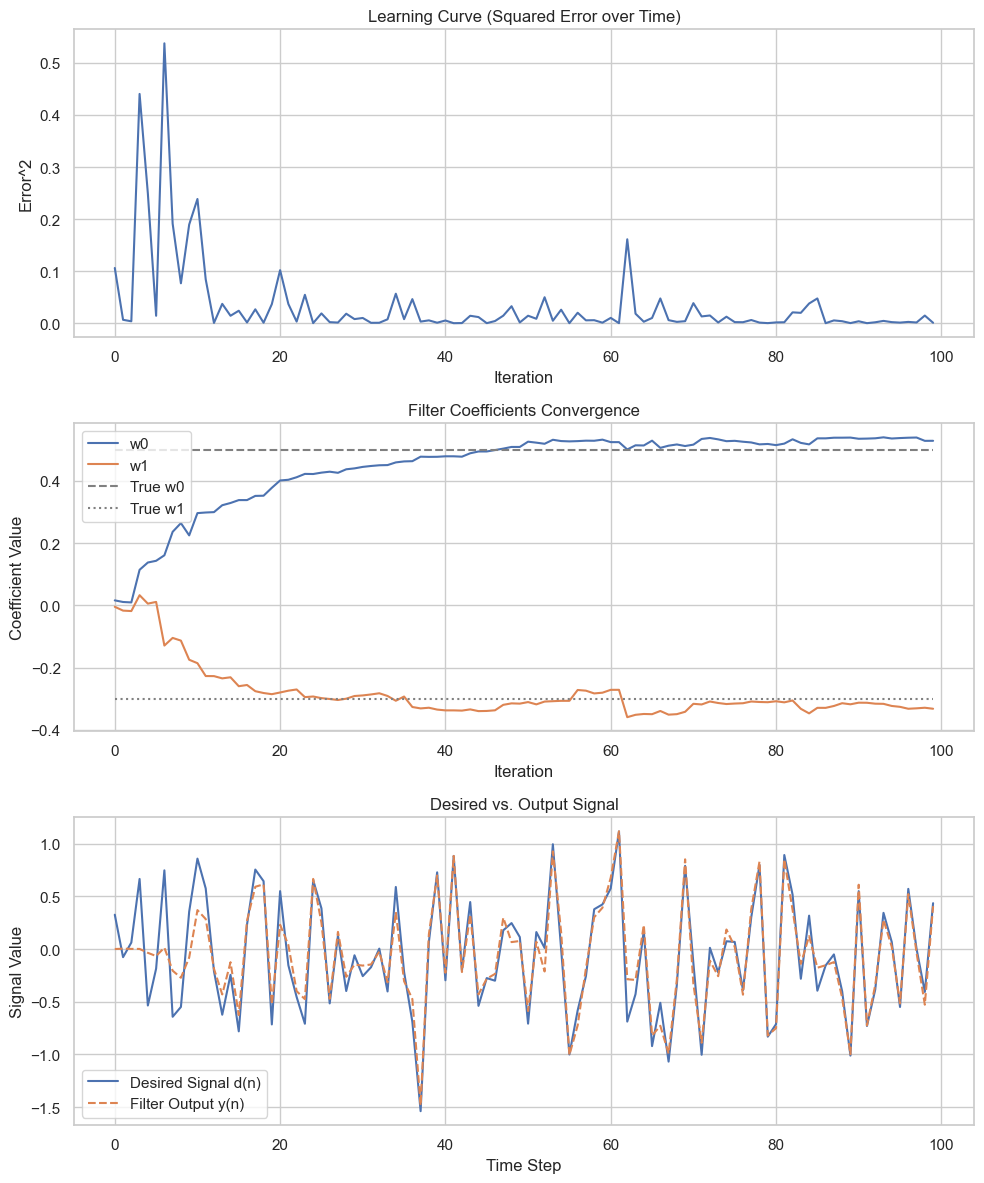

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate a basic adaptive filtering scenario

# Parameters
np.random.seed(42)
n_samples = 100
true_weights = np.array([0.5, -0.3])  # True filter coefficients
mu = 0.1  # Learning rate

# Input signal
x = np.random.randn(n_samples, 2)
noise = 0.1 * np.random.randn(n_samples)
d = x @ true_weights + noise  # Desired signal with some noise

# Adaptive filter initialization
w = np.zeros(2)
y = np.zeros(n_samples)
e = np.zeros(n_samples)
w_history = []

# LMS adaptation
for n in range(n_samples):
    y[n] = np.dot(w, x[n])
    e[n] = d[n] - y[n]
    w = w + mu * e[n] * x[n]
    w_history.append(w.copy())

w_history = np.array(w_history)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Learning Curve (Error over time)
axs[0].plot(e**2)
axs[0].set_title('Learning Curve (Squared Error over Time)')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error^2')
axs[0].grid(True)

# Coefficient Convergence
axs[1].plot(w_history[:, 0], label='w0')
axs[1].plot(w_history[:, 1], label='w1')
axs[1].hlines(true_weights[0], 0, n_samples-1, colors='gray', linestyles='dashed', label='True w0')
axs[1].hlines(true_weights[1], 0, n_samples-1, colors='gray', linestyles='dotted', label='True w1')
axs[1].set_title('Filter Coefficients Convergence')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Coefficient Value')
axs[1].legend()
axs[1].grid(True)

# Desired vs. Output Signal
axs[2].plot(d, label='Desired Signal d(n)')
axs[2].plot(y, label='Filter Output y(n)', linestyle='--')
axs[2].set_title('Desired vs. Output Signal')
axs[2].set_xlabel('Time Step')
axs[2].set_ylabel('Signal Value')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()
